## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. **При наявності ЛИШЕ візуалізацій без роз'яснень (ВИСНОВКИ!!!), робота оцінюватися НЕ БУДЕ.**

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою **titanic.csv**.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('titanic.csv')

sns.set(style="whitegrid")
sns.set_context('talk')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('titanic.csv')

**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [3]:
peop = dataset.groupby(['Sex'])['Survived'].mean()*100
print(peop)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


**Задача 2:** Відтворіть ці графіки  
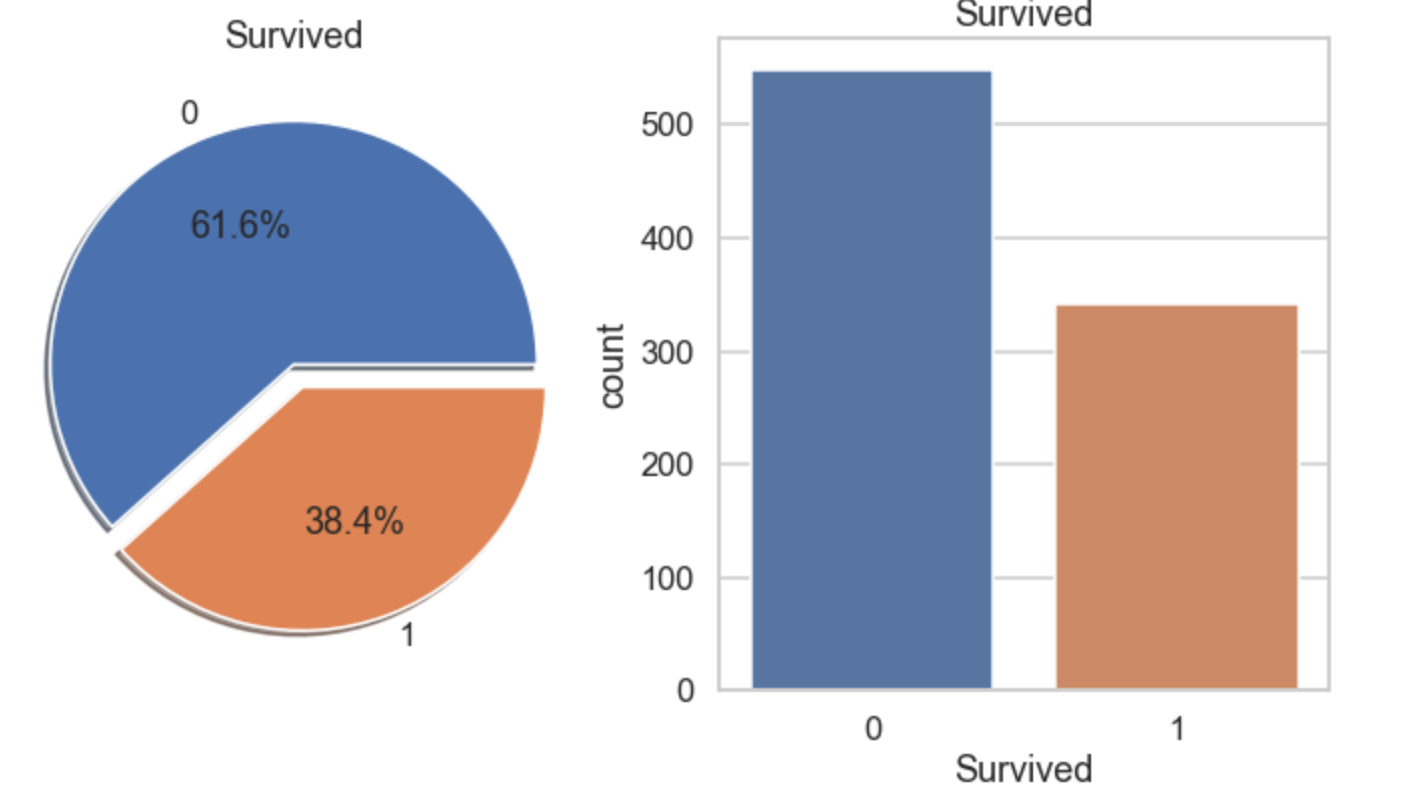


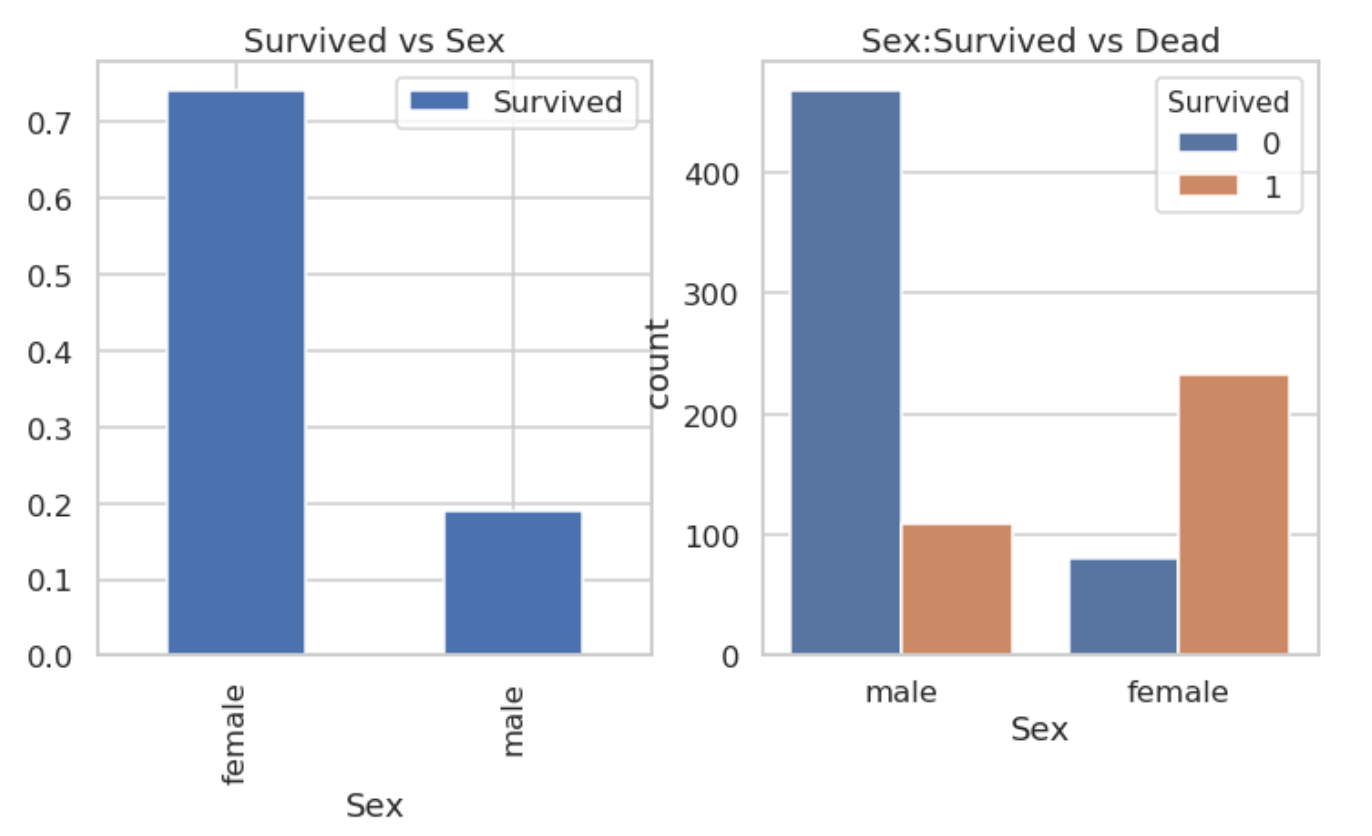

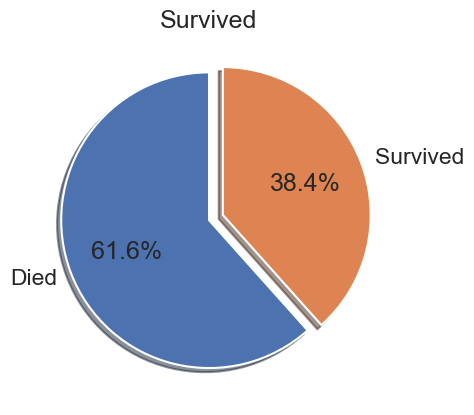

In [4]:
survived_rate = df["Survived"].mean() * 100
dead_rate = (1 - df["Survived"].mean()) * 100

labels = ['Died', 'Survived']
sizes = [dead_rate, survived_rate]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Survived")
plt.show()


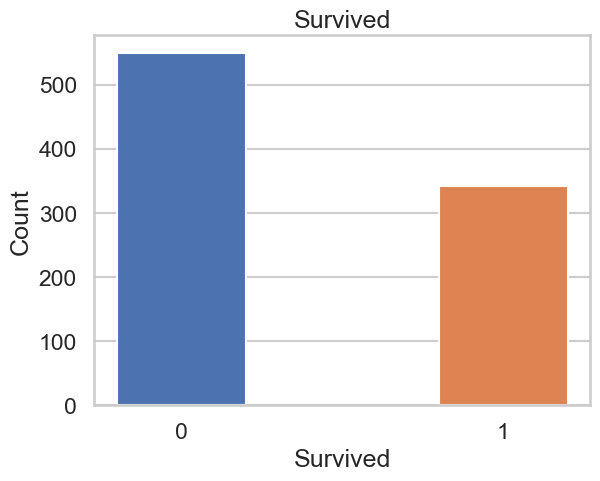

In [5]:
plt.bar("0", df['Survived'].value_counts().get(0), width = 0.4)
plt.bar("1", df['Survived'].value_counts().get(1), width = 0.4)

plt.xlabel("Survived") 
plt.ylabel("Count") 
plt.grid(axis='x')
plt.title("Survived")

plt.show()

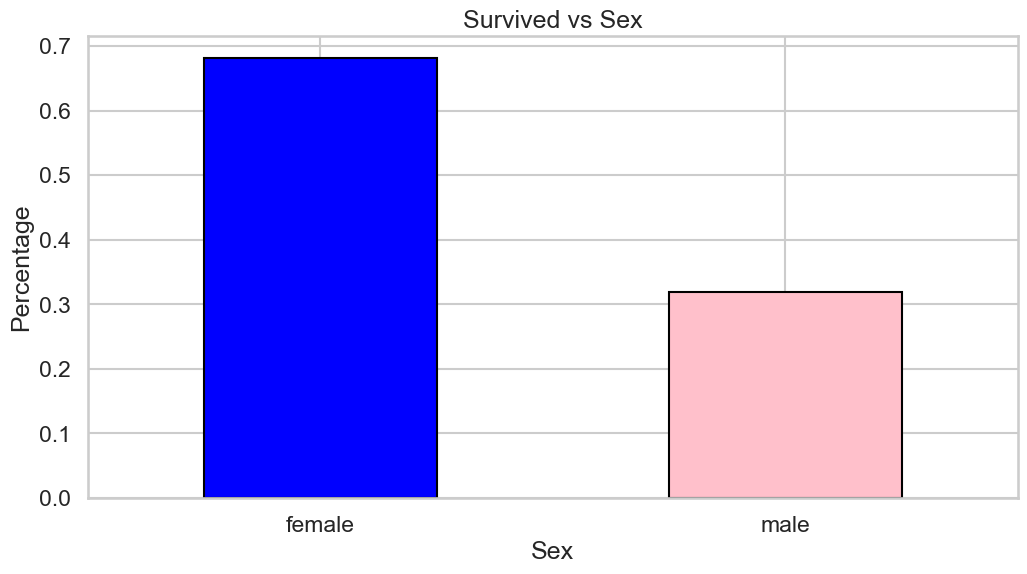

In [6]:
survived_general = dataset[dataset['Survived'] == 1]
sex_distribution = survived_general['Sex'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))
sex_distribution.plot(kind='bar', width=0.5, edgecolor='black', color=['blue', 'pink'])
plt.title("Survived vs Sex")
plt.ylabel('Percentage')
plt.xticks(rotation=0) 
plt.show()

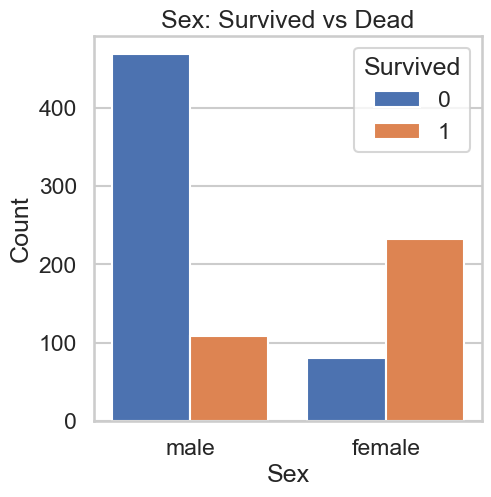

In [7]:
plt.figure(figsize=(5,5))
barWidth = 0.4

surv = [df.loc[df['Sex'] == "male", "Survived"].value_counts().get(0),
        df.loc[df['Sex'] == "female", "Survived"].value_counts().get(0)]
dead = [df.loc[df['Sex'] == "male", "Survived"].value_counts().get(1),
       df.loc[df['Sex'] == "female", "Survived"].value_counts().get(1)]

r1 = np.arange(len(surv))
r2 = [x + barWidth for x in r1]

plt.bar(r1, surv, width = barWidth, edgecolor = 'white', label='0')
plt.bar(r2, dead, width = barWidth, edgecolor = 'white', label='1')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='x')
plt.title('Sex: Survived vs Dead')
plt.xticks([r + barWidth/2 for r in range(len(surv))], ['male', 'female'])
plt.legend(title = "Survived")
plt.show()

Прокоментуйте побудовані графіки

**Висновки до завдання 2**:


1. Даний графік 1 зображає процентне співвідношення виживжих та загиблих(38.4%;61.6%)
2. Даний графік 2 зображає кількість виживжих та загиблих (≈300;≈500)
3. Даний графік 3 зображає скільки чоловіків та жінок загинуло 
4. Даний графік 4 зображає відношення виживших жінок до чолоків 


**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [9]:
def find_popular_name_by_sex(sex: str):
    filtered_df_by_sex = df[df['Sex'] == sex]
    extracted_names = filtered_df_by_sex['Name'].str.extract(r'\((\w+)') if sex == 'female' else filtered_df_by_sex['Name'].str.extract(r'.\. (\w+)')
    popular_names = extracted_names.value_counts().head(5)
    return popular_names

the_most_popular_female_name = find_popular_name_by_sex('female')
print('The most popular female names:', the_most_popular_female_name)

The most popular female names: Anna         6
Elizabeth    6
Mary         5
Ada          4
Margaret     4
Name: count, dtype: int64


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [10]:
top_name_f = dataset[dataset['Sex']=='male'].Name.tolist()
t=[]
t1=[]
t2={}
for x1 in top_name_f:
  t.append(x1.split())
for x2 in t:
  t1.append(x2[2])
for x3 in set(t1):
  t2[x3]=t1.count(x3)
print(max(t2, key=t2.get))

William


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
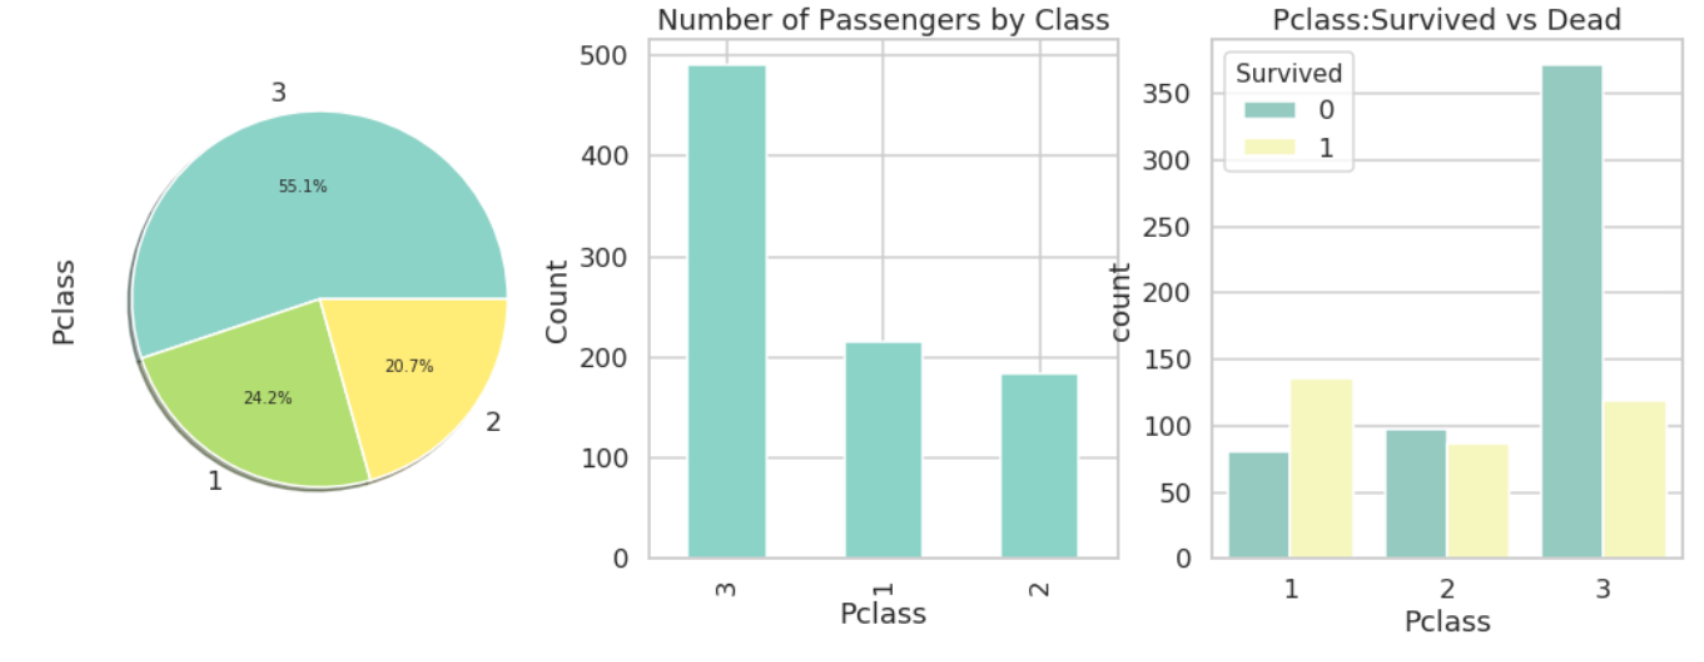

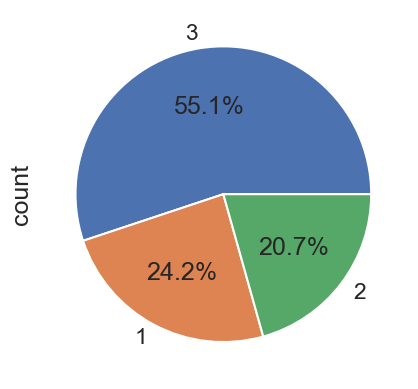

In [11]:
o = dataset['Pclass'].value_counts()
o.plot.pie(autopct= '%1.1f%%')
plt.show()


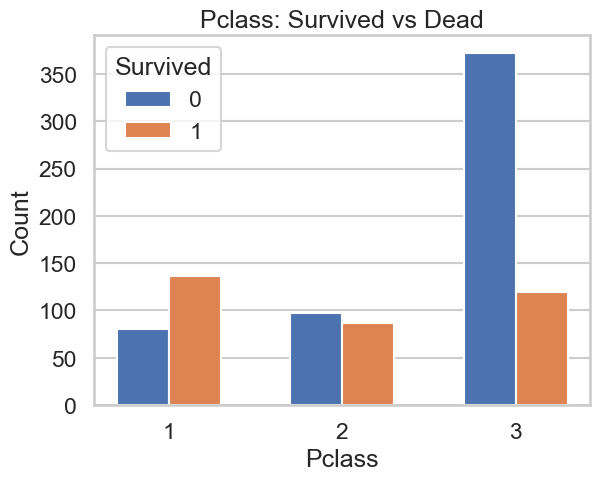

In [12]:
pclass_counts = [df.loc[df['Pclass'] == i, "Survived"].value_counts() for i in range(1, 4)]
survived_counts = [pclass_counts[i].get(0, 0) for i in range(3)]
dead_counts = [pclass_counts[i].get(1, 0) for i in range(3)]

barWidth = 0.3
r1 = np.arange(len(survived_counts))
r2 = [x + barWidth for x in r1]

plt.bar(r1, survived_counts, width=barWidth, label='0')
plt.bar(r2, dead_counts, width=barWidth, label='1')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass: Survived vs Dead')
plt.grid(axis='x')
plt.xticks([r + barWidth/2 for r in range(len(survived_counts))], ['1', '2', '3'])
plt.legend(title="Survived")
plt.show()

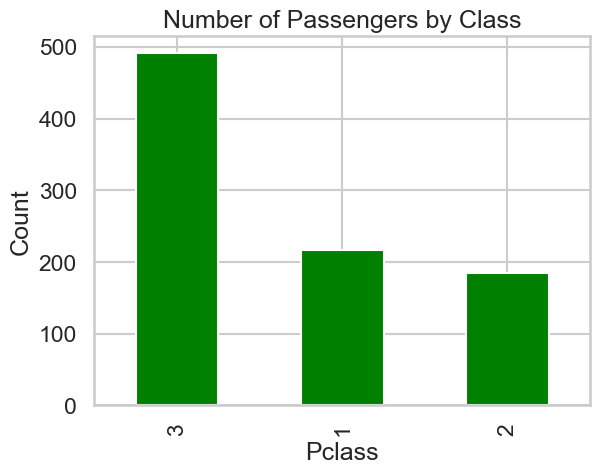

In [13]:
l = dataset['Pclass'].value_counts()
l.plot.bar(l, color='green')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Number of Passengers by Class')
plt.show()

Прокоментуйте побудовані графіки

**Висновки до завдання 6**:


1.   Даний графік 1 зображає процентне співвідношення пасажирів в кожному класі
2.   Даний графік 2 зображає кількісний показник виживших і загиблих в трьох класах
3.   Даний графік 3 зображає кількість людей в кожному класі



**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
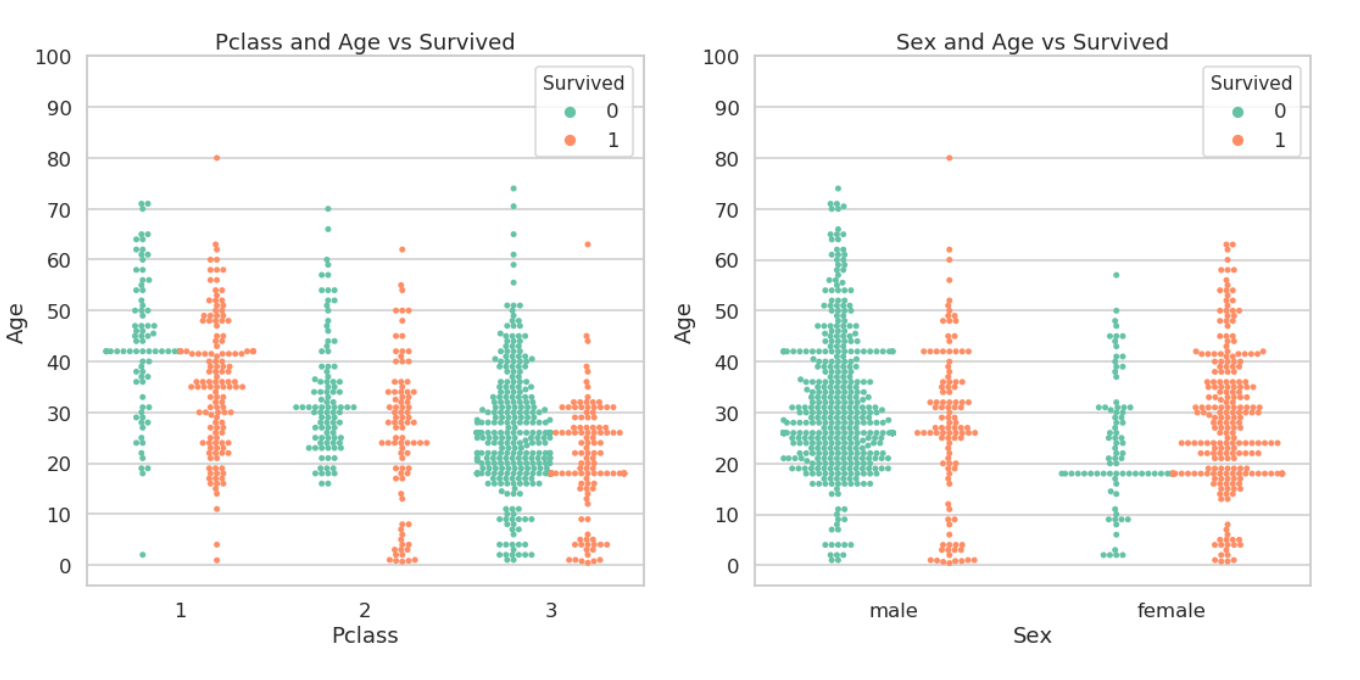![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

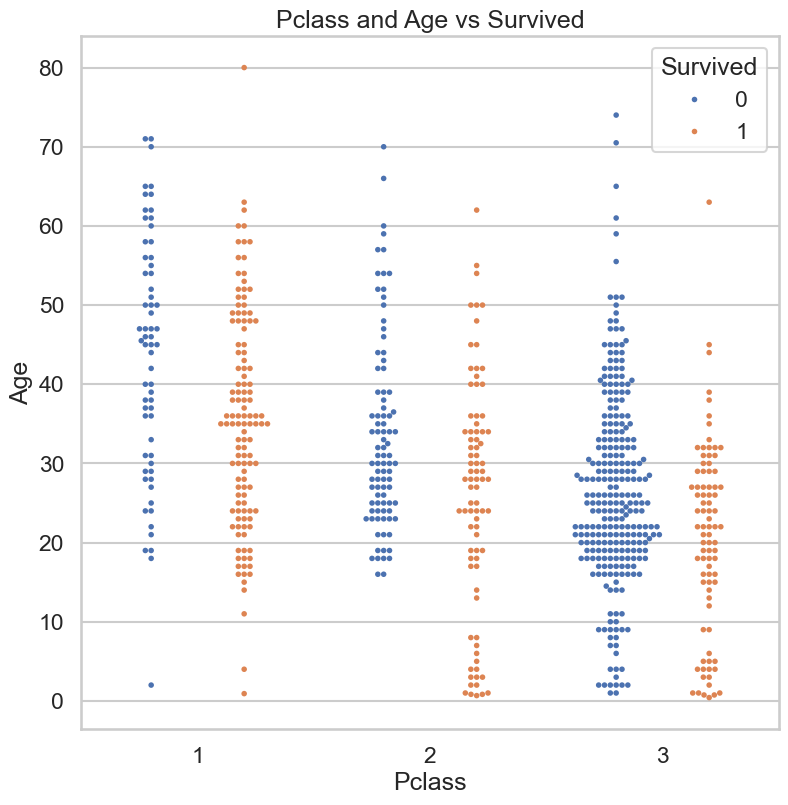

In [14]:
plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.title("Pclass and Age vs Survived")

ax = sns.swarmplot(x="Pclass", y="Age", hue="Survived", size=4, data=df, dodge=True)

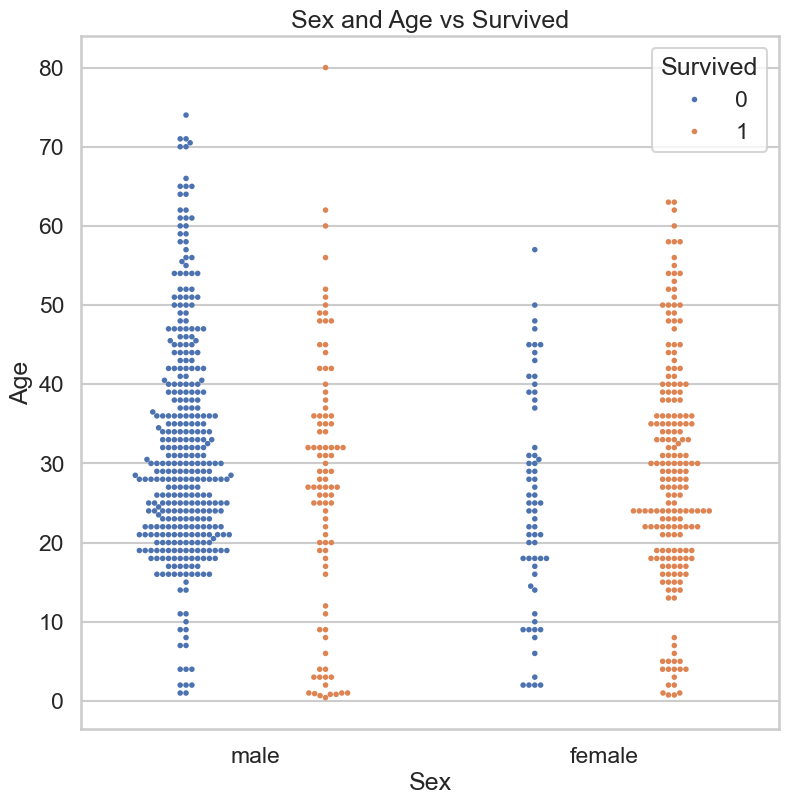

In [15]:
plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.title("Sex and Age vs Survived")

ax = sns.swarmplot(x="Sex", y="Age", hue="Survived", size=4, data=df, dodge=True)

Прокоментуйте побудовані графіки

**Висновки до завдання 7**:


1.   Даний графік 1 зображає смертність серед людей за віком і класом

2.   Даний графік 2 зображає смертність серед людей за сттатю і віком


**Задача 8** Побудуйте наступні діаграми розподілів:  

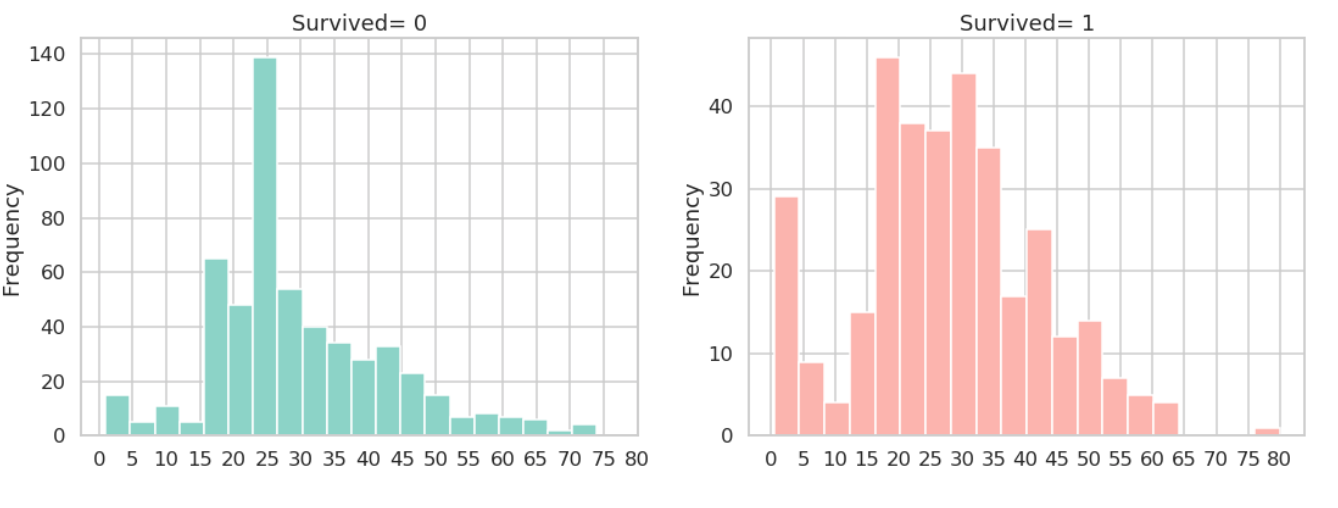



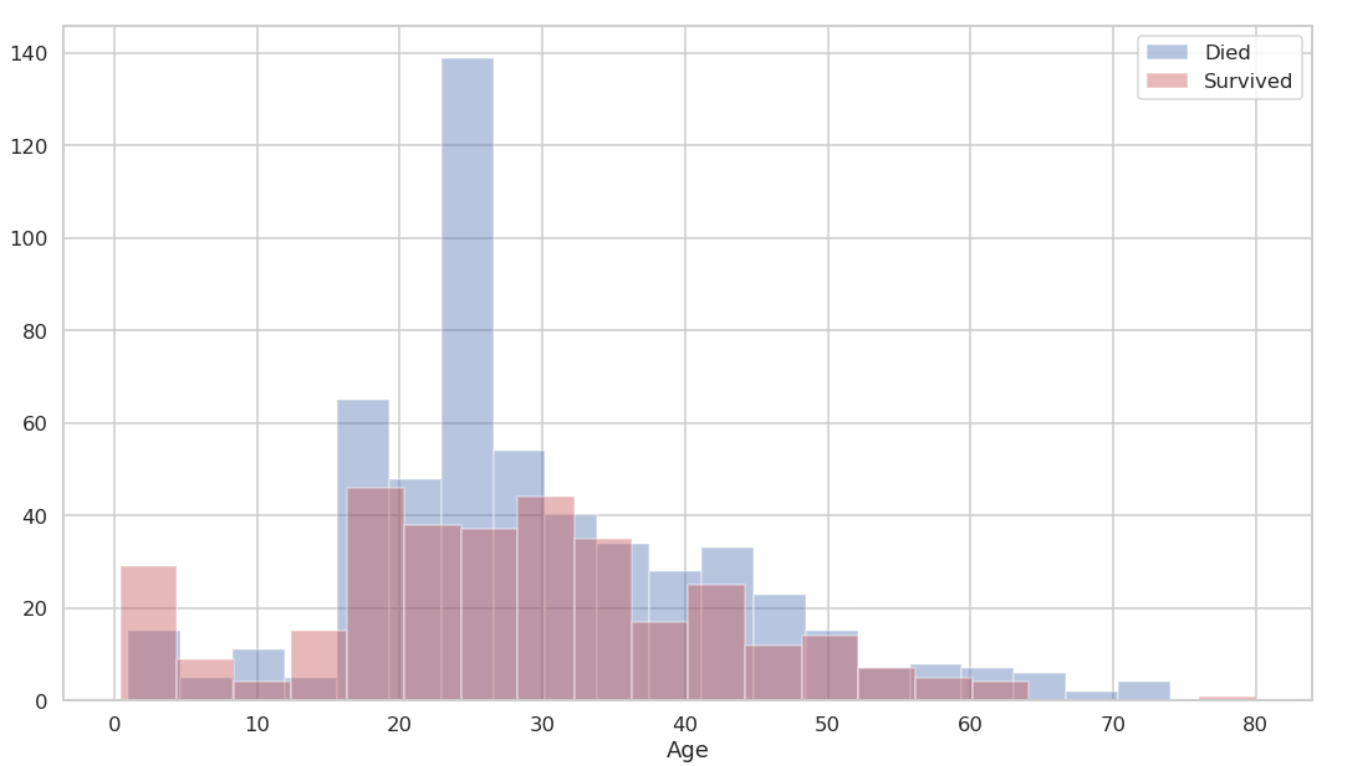

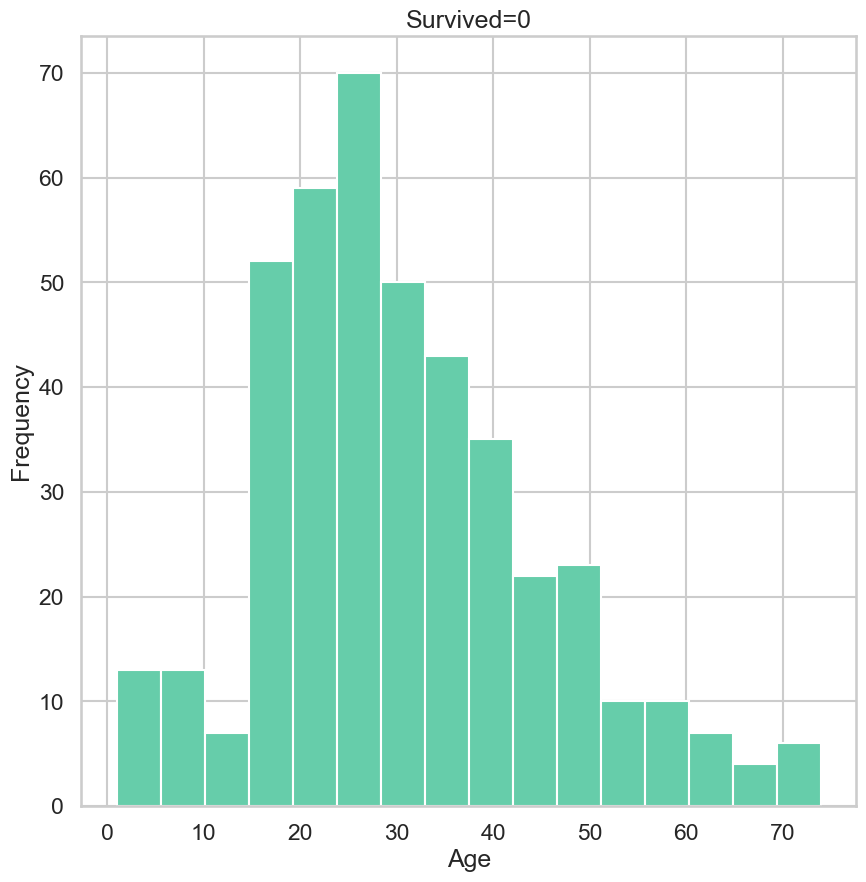

In [16]:
plt.figure(figsize=(10,10))

plt.ylabel('Frequency')
plt.title('Survived=0')

sns.distplot(df[df['Survived']==0].Age, color='#66CDAA', kde=False, hist_kws=dict(alpha=1))
plt.show()

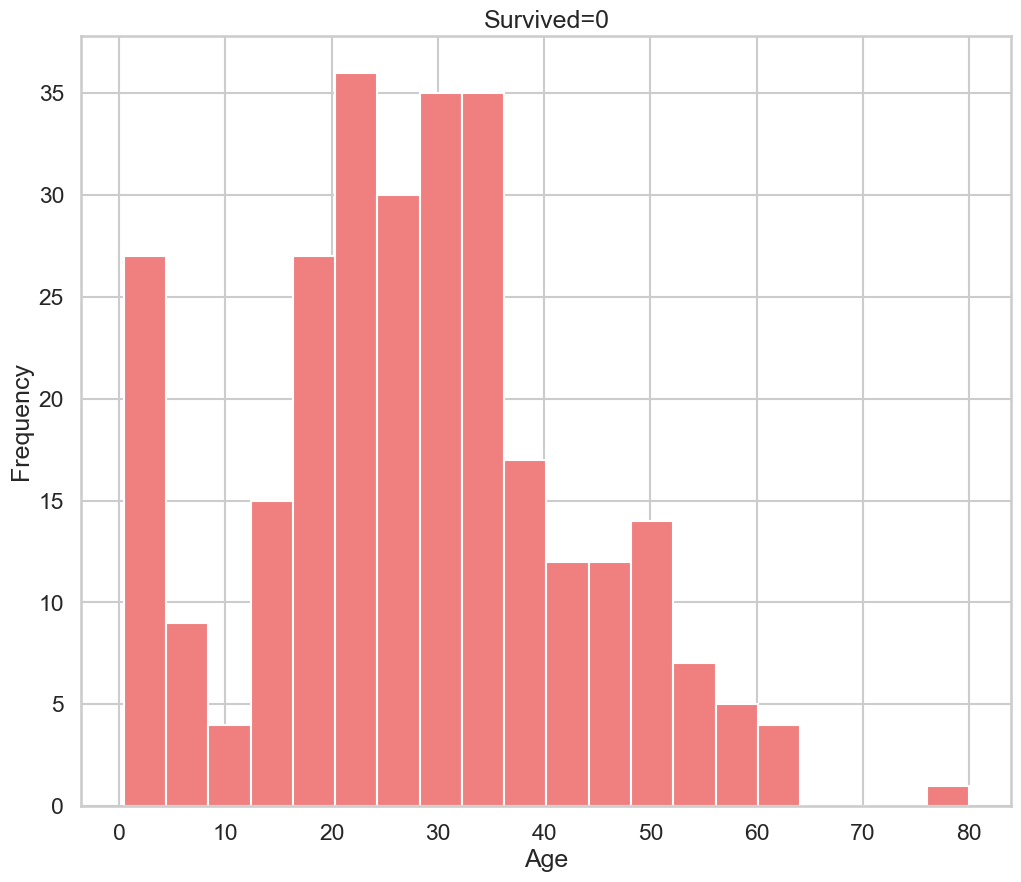

In [17]:
plt.figure(figsize=(12,10))

plt.ylabel('Frequency')
plt.title('Survived=0')

sns.distplot(df[df['Survived']==1].Age, bins=20, color='#F08080', kde=False, hist_kws=dict(alpha=1))
plt.show()

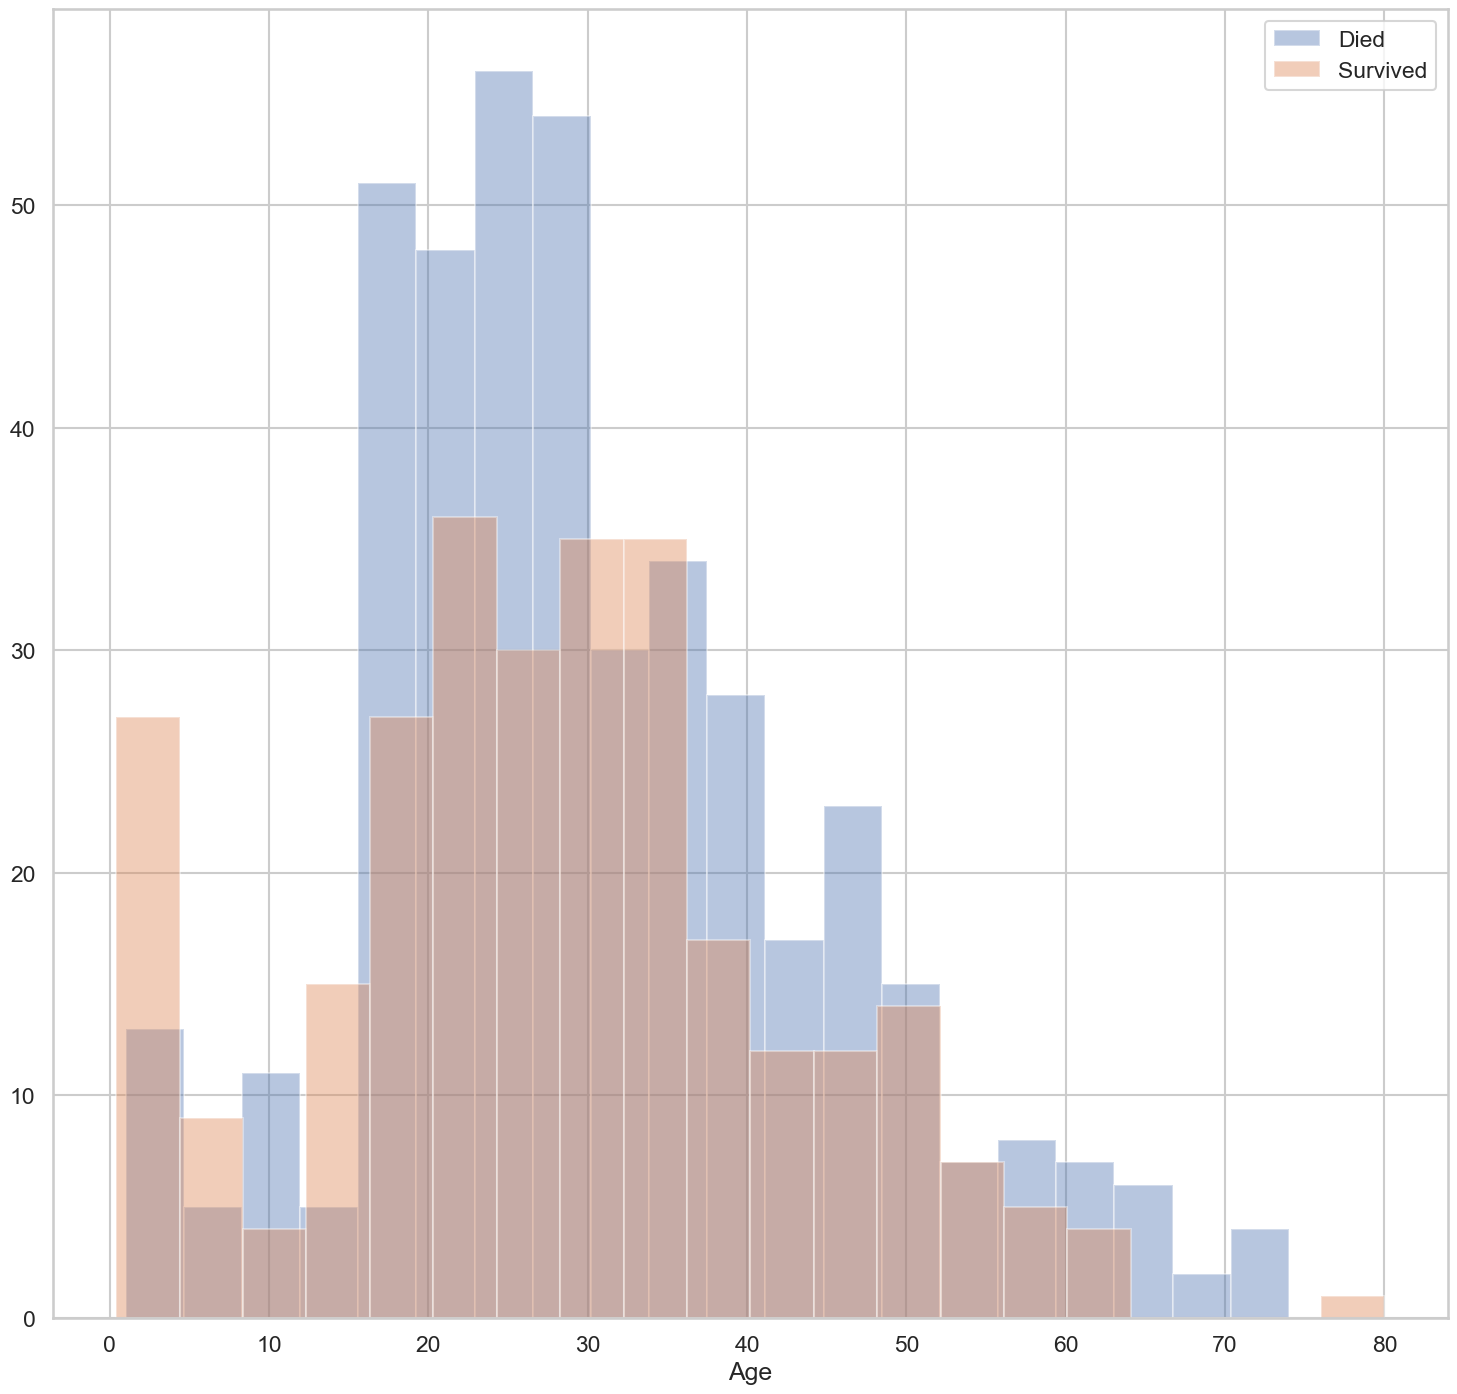

In [18]:
plt.figure(figsize=(18,17))
sns.distplot(df[df['Survived']==0].Age, bins=20, kde=False, label='Died')
sns.distplot(df[df['Survived']==1].Age, bins=20, kde=False, label='Survived')
plt.legend()
plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


**Висновки до завдання 8**: Дати відповідь на питання!!!


Для точних статистичних даних візуалізації не є достатньо, проте можна зробити припущення щодо статистики смерті за віком



**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
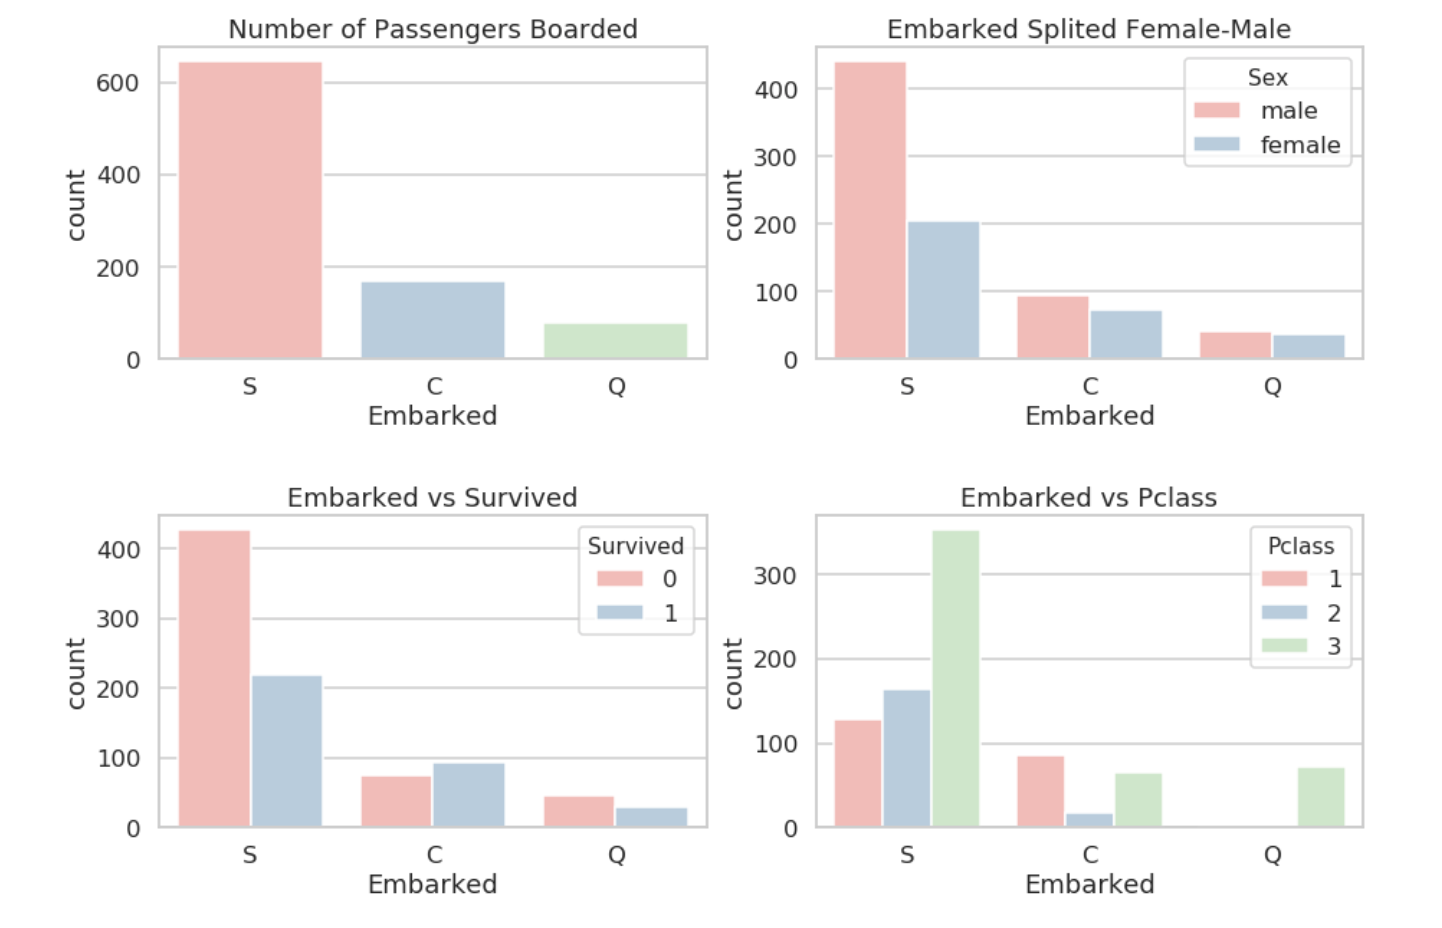

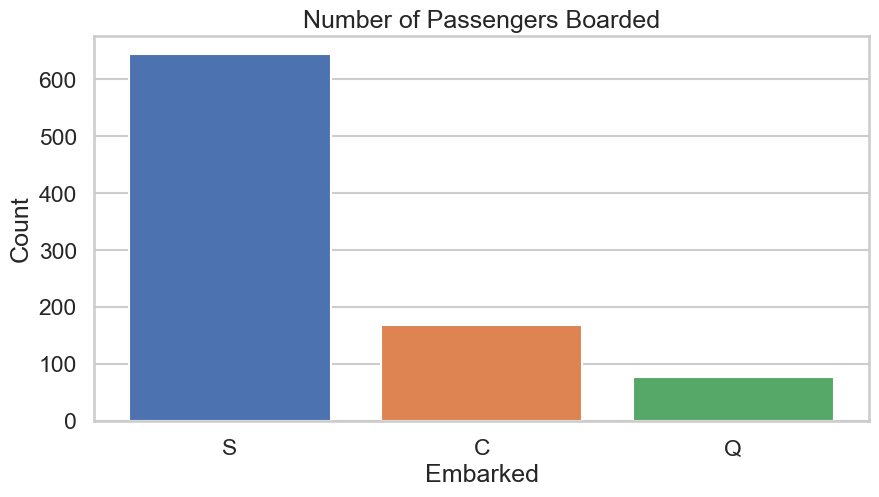

In [19]:
plt.figure(figsize=(10,5))

embarkedS = df["Embarked"].value_counts().get(0)
embarkedC = df["Embarked"].value_counts().get(1)
embarkedQ = df["Embarked"].value_counts().get(2)

plt.bar("S", embarkedS)
plt.bar("C", embarkedC)
plt.bar("Q", embarkedQ)

plt.grid()
plt.xlabel("Embarked") 
plt.ylabel("Count") 
plt.title("Number of Passengers Boarded")
plt.grid(axis='y')

plt.show()

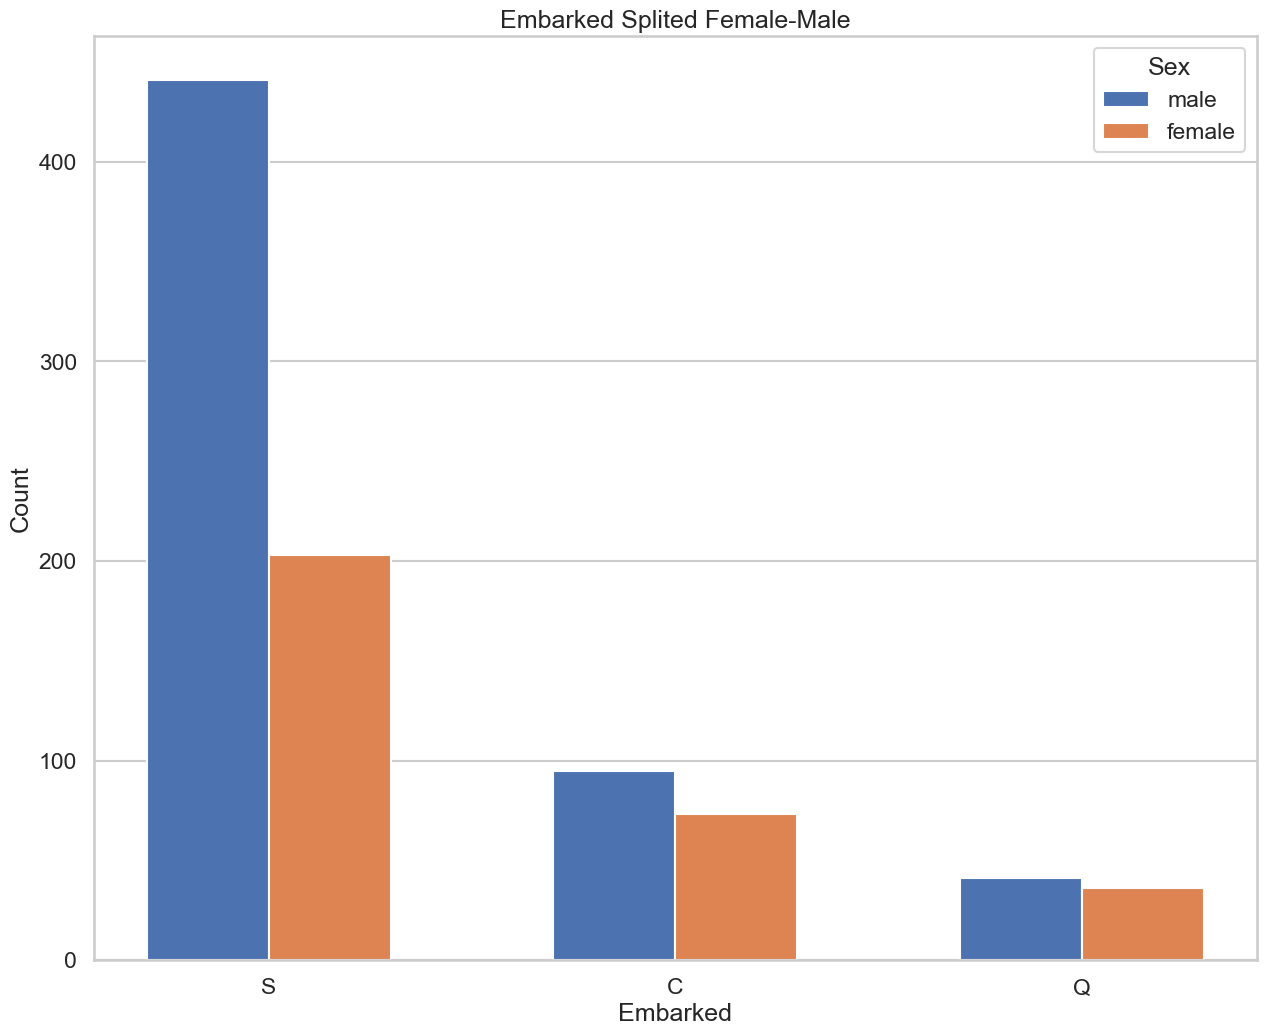

In [20]:
plt.figure(figsize=(15, 12))

embarked_counts = [df.loc[df['Embarked'] == port, 'Sex'].value_counts() for port in ['S', 'C', 'Q']]
male_counts = [embarked_counts[i].get('male', 0) for i in range(3)]
female_counts = [embarked_counts[i].get('female', 0) for i in range(3)]

barWidth = 0.3
r1 = np.arange(len(male_counts))
r2 = [x + barWidth for x in r1]

plt.bar(r1, male_counts, width=barWidth, label='male')
plt.bar(r2, female_counts, width=barWidth, label='female')

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked Splited Female-Male')
plt.grid(axis='x')
plt.xticks([r + barWidth/2 for r in range(len(male_counts))], ['S', 'C', 'Q'])
plt.legend(title="Sex")
plt.show()

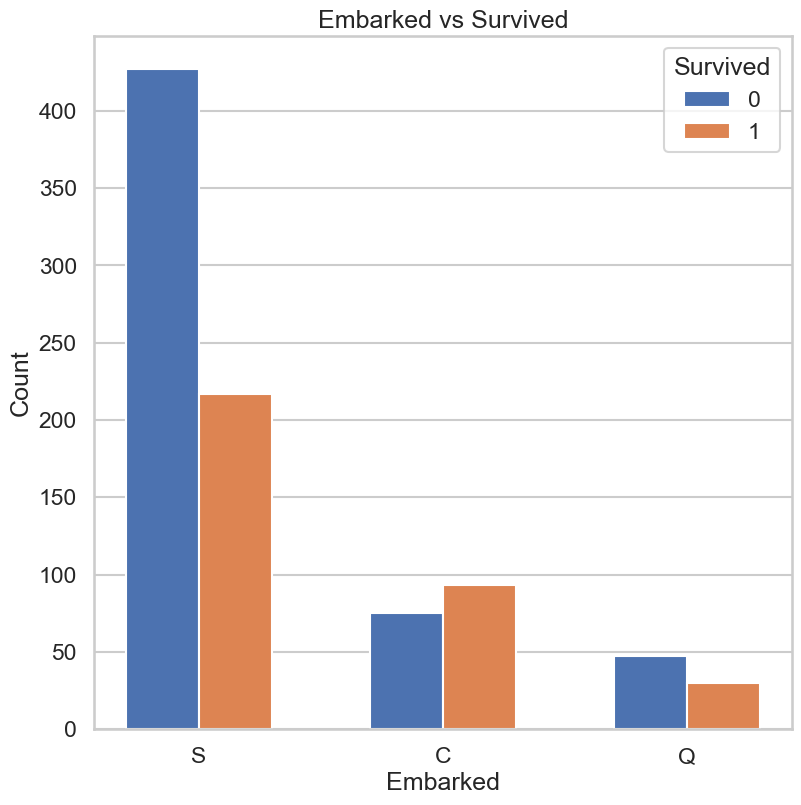

In [21]:
surv = [df.loc[df['Embarked'] == 'S', 'Survived'].value_counts().get(1),
        df.loc[df['Embarked'] == 'C', 'Survived'].value_counts().get(1),
        df.loc[df['Embarked'] == 'Q', 'Survived'].value_counts().get(1)]
dead = [df.loc[df['Embarked'] == 'S', 'Survived'].value_counts().get(0),
        df.loc[df['Embarked'] == 'C', 'Survived'].value_counts().get(0),
        df.loc[df['Embarked'] == 'Q', 'Survived'].value_counts().get(0)]

r1 = np.arange(len(surv))
r2 = [x + barWidth for x in r1]

plt.bar(r1, dead, width = barWidth, label='0')
plt.bar(r2, surv, width = barWidth, label='1')

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked vs Survived')
plt.grid(axis='x')
plt.xticks([r + barWidth/2 for r in range(len(surv))], ['S', 'C', 'Q'])
plt.legend(title = "Survived")
plt.show()

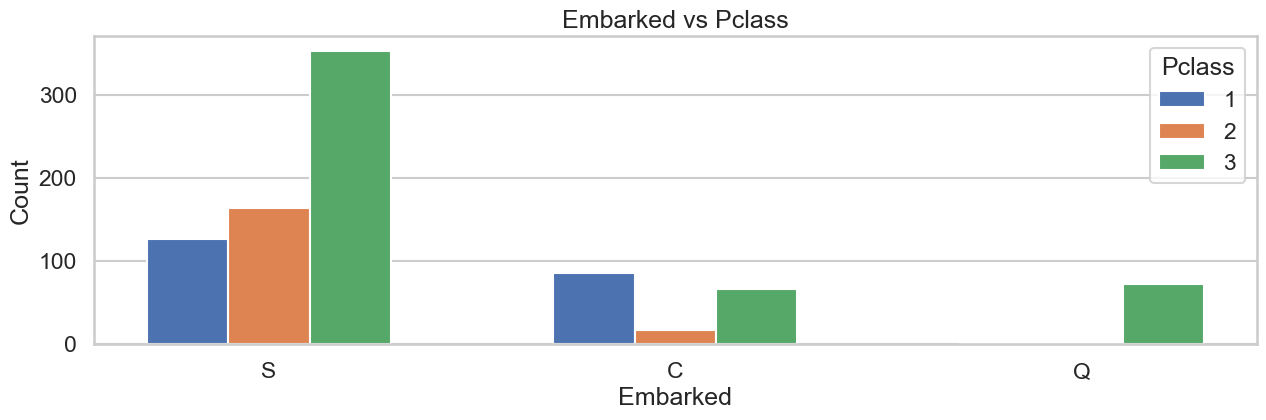

In [22]:
plt.figure(figsize=(15, 4))

pclass_counts = [df.loc[df['Embarked'] == port, 'Pclass'].value_counts() for port in ['S', 'C', 'Q']]
pclass_1_counts = [pclass_counts[i].get(1, 0) for i in range(3)]
pclass_2_counts = [pclass_counts[i].get(2, 0) for i in range(3)]
pclass_3_counts = [pclass_counts[i].get(3, 0) for i in range(3)]

barWidth = 0.2
r1 = np.arange(len(pclass_1_counts))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, pclass_1_counts, width=barWidth, label='1')
plt.bar(r2, pclass_2_counts, width=barWidth, label='2')
plt.bar(r3, pclass_3_counts, width=barWidth, label='3')

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked vs Pclass')
plt.grid(axis='x')
plt.xticks([r + barWidth for r in range(len(pclass_1_counts))], ['S', 'C', 'Q'])
plt.legend(title="Pclass")
plt.show()

**Висновки до завдання 9**:


1.   Даний графік 1 зображає кількість пасажирів на борту на кожен з класів відповідно до порту де вони сіли (найпопулярніший порт S-Саутгемптон)
2.   Даний графік 2 зображає кількість пасажирів на борту за статтю на кожен порт
3.   Даний графік 3 зображає кількість пасажирів у відношення прибувших і виживших на кожен порт



**Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


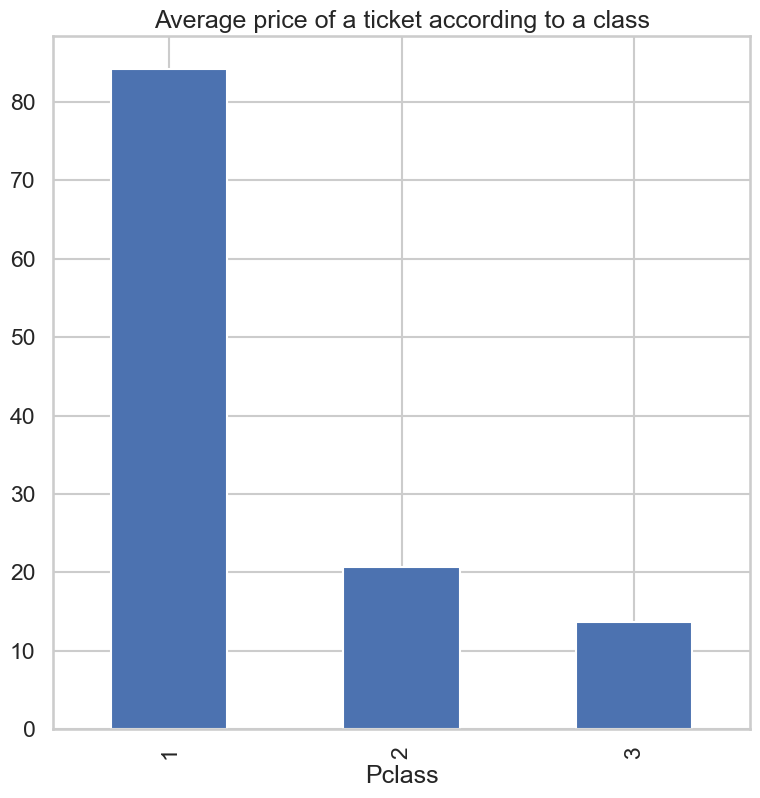

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('titanic.csv')

e = dataset.groupby(['Pclass'])['Fare'].mean()
print(e)
e.plot.bar(e)
plt.title('Average price of a ticket according to a class')
plt.show()



Прокоментуйте побудовані графіки

**Висновки до завдання 10**:

Даний графік зображає вартість білету відповідно до класу(1ий клас найдорожчі квитки і по спадаючій)
